In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import scipy as sp

In [8]:
INPUT_FILE = "intermediate/temperature.csv"

In [9]:
df = pd.read_csv(INPUT_FILE)
df.head()

,date,cpu_temp,fan0,fan1,current_charge,max_charge,battery_temp,delta_time,delta,load_1m,load_5m,load_15m,macos
0,2023-01-01 18:38:25-03:00,54.00,1846,1699,7802,7833,30.30,0 days 00:00:00,0.000000,2.87,1.78,1.45,monterey
1,2023-01-01 18:38:35-03:00,52.94,1846,1701,7802,7833,29.59,0 days 00:00:10,0.166667,2.81,1.80,1.46,monterey
2,2023-01-01 18:38:45-03:00,53.31,1835,1689,7802,7833,29.80,0 days 00:00:20,0.333333,2.67,1.81,1.46,monterey
3,2023-01-01 18:38:56-03:00,53.00,1846,1717,7802,7833,29.80,0 days 00:00:31,0.516667,2.50,1.80,1.46,monterey
4,2023-01-01 18:39:06-03:00,52.13,1835,1698,7802,7833,29.80,0 days 00:00:41,0.683333,2.26,1.77,1.46,monterey


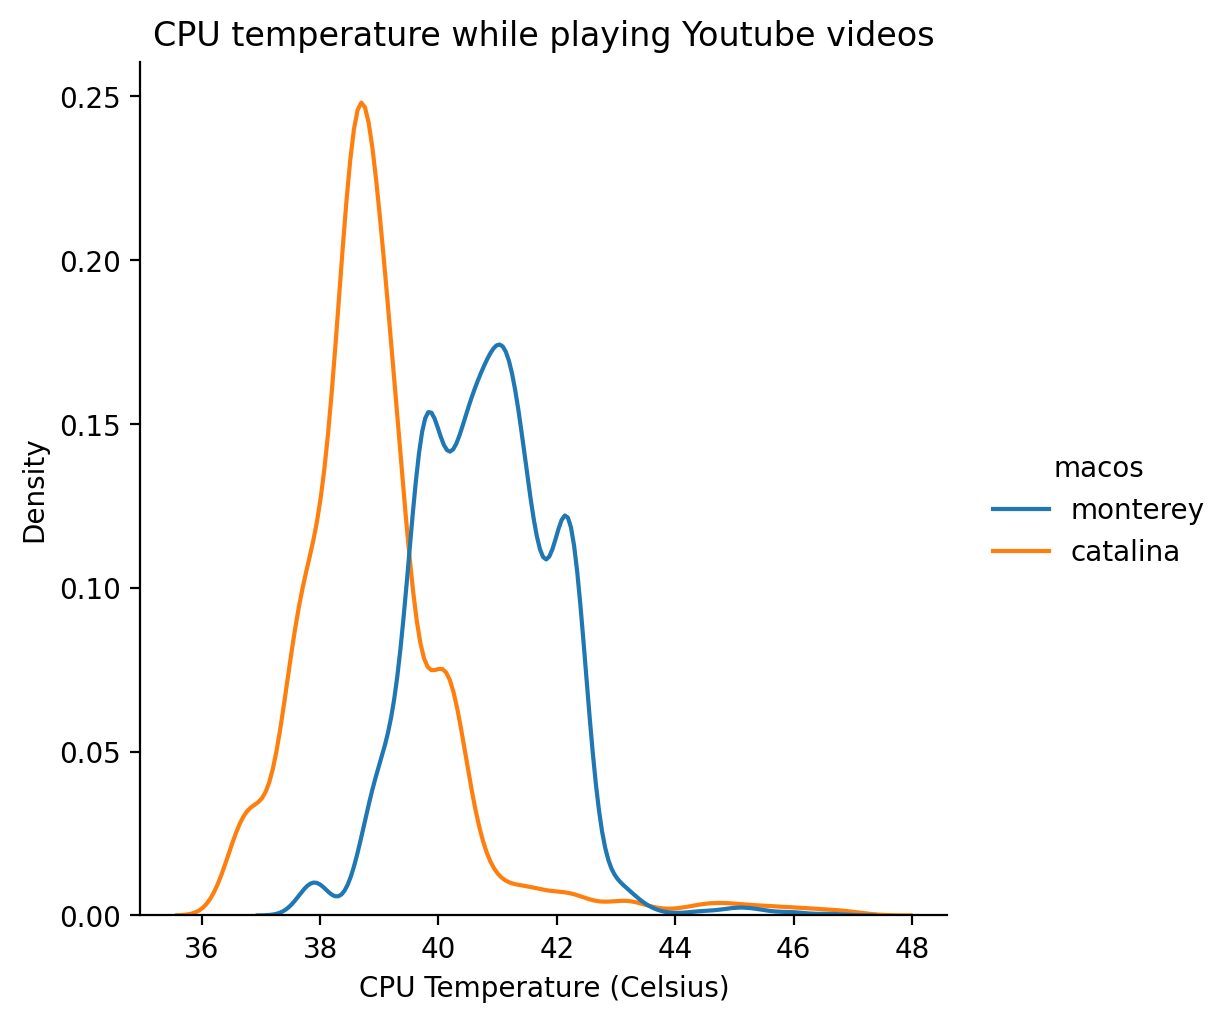

In [10]:
cutout = df['cpu_temp'].quantile(0.99)
sns.displot(data=df[df['cpu_temp'] < cutout], x="cpu_temp", hue="macos", kind="kde")
plt.title("CPU temperature while playing Youtube videos")
plt.xlabel("CPU Temperature (Celsius)");

In [11]:
# Test Kolmogorov–Smirnov
x = df[df['macos'] == 'catalina']['cpu_temp']
y = df[df['macos'] == 'monterey']['cpu_temp']
sp.stats.ks_2samp(x, y)

KstestResult(statistic=0.7174849535303651, pvalue=0.0)

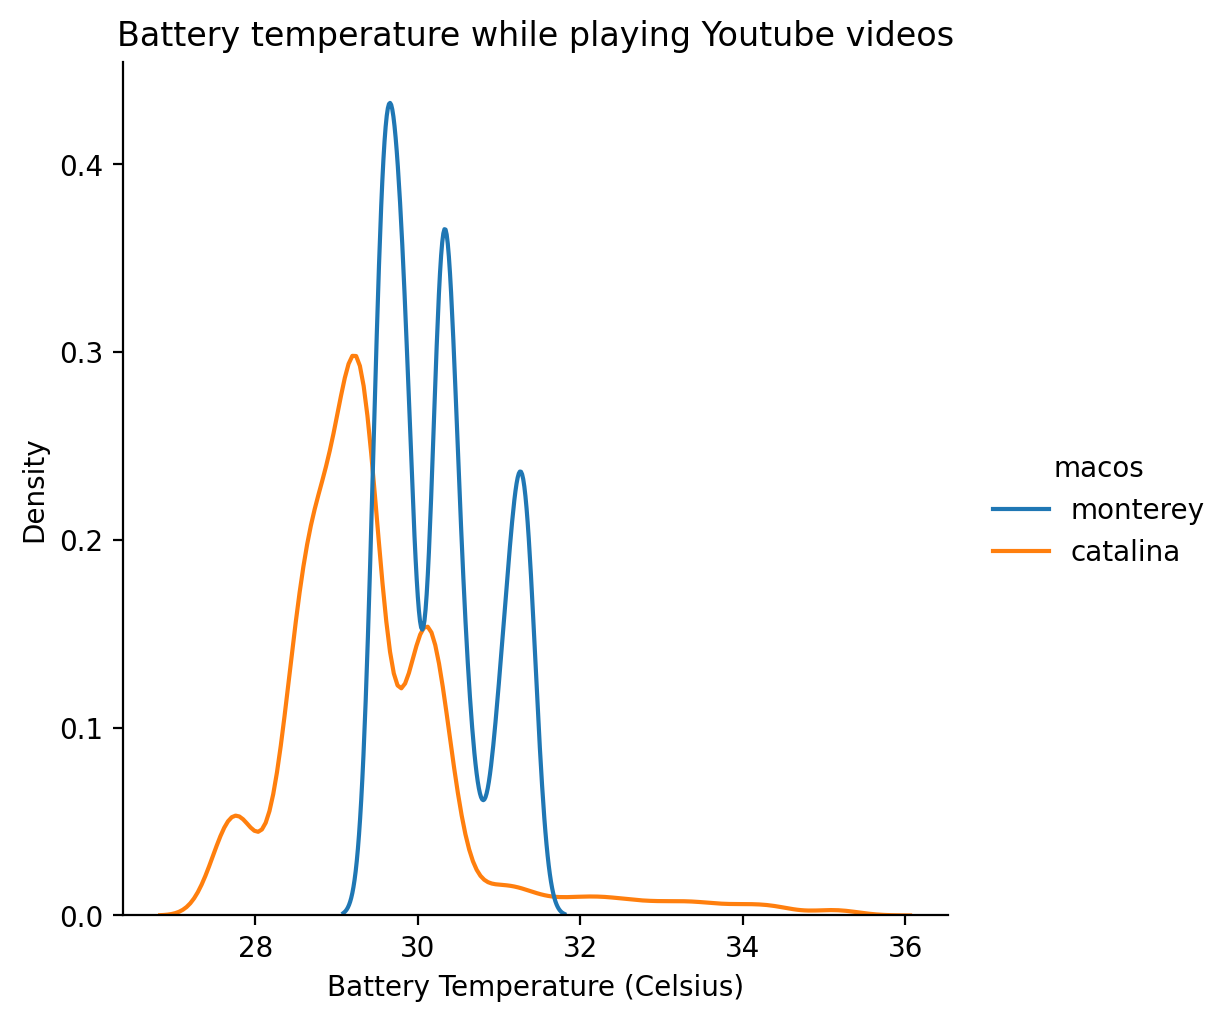

In [12]:
cutout = df['battery_temp'].max()
sns.displot(data=df[df['battery_temp'] < cutout], x="battery_temp", hue="macos", kind="kde")
plt.title("Battery temperature while playing Youtube videos")
plt.xlabel("Battery Temperature (Celsius)");

In [13]:
# Test Kolmogorov–Smirnov
x = df[df['macos'] == 'catalina']['battery_temp']
y = df[df['macos'] == 'monterey']['battery_temp']
sp.stats.ks_2samp(x, y)

KstestResult(statistic=0.6970198675496688, pvalue=0.0)

In [14]:
df[df['macos'] == 'catalina']['delta_time'].max()

'0 days 05:07:18'

In [15]:
df[df['macos'] == 'monterey']['delta_time'].max()

'0 days 05:07:07'

In [16]:
df.describe()

,cpu_temp,fan0,fan1,current_charge,max_charge,battery_temp,delta,load_1m,load_5m,load_15m
count,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000
mean,40.000957,1836.687724,1700.679448,3957.331310,7793.810207,29.857217,153.564579,1.794825,1.776841,1.722695
std,1.989923,20.207358,18.291344,2262.985721,15.657670,1.020991,88.724092,0.393561,0.216549,0.178558
min,36.500000,1806.000000,1660.000000,4.000000,7750.000000,27.590000,0.000000,0.720000,1.040000,0.690000
25%,38.750000,1830.000000,1695.000000,1988.000000,7782.000000,29.300000,76.766667,1.520000,1.610000,1.590000
50%,39.810000,1838.000000,1700.000000,3996.000000,7795.000000,29.800000,153.533333,1.770000,1.770000,1.710000
75%,41.000000,1842.000000,1705.000000,5957.000000,7804.000000,30.300000,230.366667,2.030000,1.930000,1.870000
max,60.310000,2373.000000,2187.000000,7802.000000,7850.000000,35.390000,307.300000,3.490000,2.400000,2.130000
